In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Generate some data

from sklearn.datasets import make_blobs
X,y_true = make_blobs(n_samples = 400, centers=4,cluster_std = 0.60, random_state=0)

In [3]:
X = X[:, ::-1]

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)

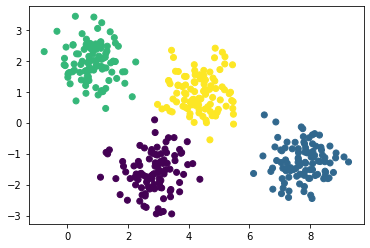

In [5]:
plt.scatter(X[:,0], X[:,1], c = labels)

In [6]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [7]:
kmeans.cluster_centers_

array([[ 2.84849883, -1.61366997],
       [ 7.75608144, -1.2689694 ],
       [ 0.83945671,  1.95662677],
       [ 4.36874542,  0.95041055]])

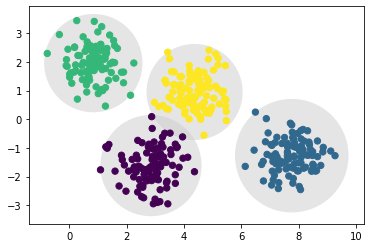

In [8]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
plot_kmeans(kmeans,X )

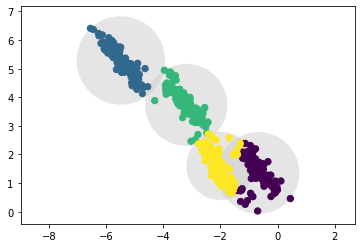

In [9]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2,2))

kmeans = KMeans(n_clusters = 4, random_state = 0)
plot_kmeans(kmeans, X_stretched)

In [11]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components =4).fit(X)

In [12]:
labels = gmm.predict(X)

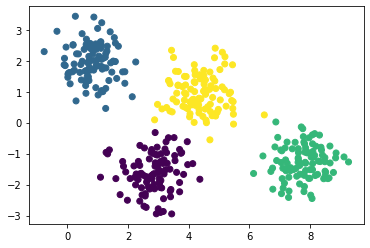

In [13]:
plt.scatter(X[:,0], X[:,1], c=labels)

In [14]:
probs = gmm.predict_proba(X)

In [15]:
probs[:]

array([[2.44308441e-07, 1.65215923e-22, 4.63288197e-01, 5.36711559e-01],
       [9.99999999e-01, 4.61002437e-15, 1.97401298e-17, 1.23381253e-09],
       [9.99999997e-01, 2.99373575e-17, 2.36418727e-14, 2.72647597e-09],
       ...,
       [1.98562003e-08, 9.99999929e-01, 2.13417745e-36, 5.16035665e-08],
       [4.36840842e-01, 3.72295841e-04, 2.75648827e-15, 5.62786862e-01],
       [5.40633679e-14, 1.00000000e+00, 9.78639953e-47, 1.37230633e-11]])

In [16]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_ , gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

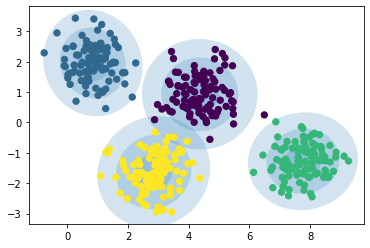

In [17]:
gmm = GaussianMixture(n_components = 4, random_state = 42)
plot_gmm(gmm, X)

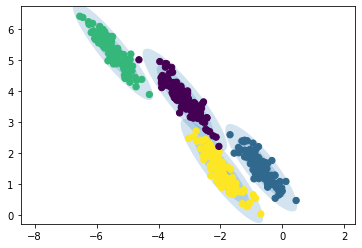

In [19]:
plot_gmm(gmm, X_stretched)

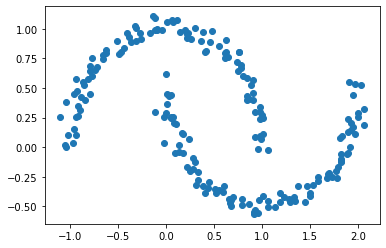

In [24]:
from sklearn.datasets import make_moons

Xmoon, ymoon = make_moons(200, noise = .05, random_state = 42)
plt.scatter(Xmoon[:,0], Xmoon[:,1])

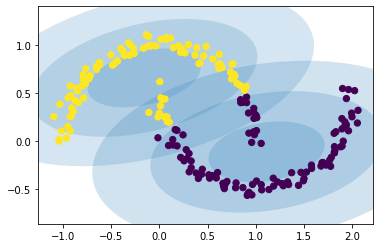

In [25]:
gmm2 = GaussianMixture(n_components = 2, random_state = 42)
plot_gmm(gmm2, Xmoon)